## Implementation of Stochastic Gradient Descent 

## Boston Housing Dataset
1. The dataset contains a total of 506 cases.

2. Each data point has 14 attributes.

3. Target variable to predict is the housing price.

In [1]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [35]:
# Load the dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target

In [36]:
# Normalizing the data using MinMaxScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [37]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [38]:
# This function helps in generating a random
# sample of 150 points from the training data

def get_random_sample(X_train, y_train):
    y_train = y_train.reshape(y_train.shape[0], 1)

    # Pick only K points out of n for SGD
    # We will take the value of K as 150
    train_data = np.hstack((X_train, y_train))

    # Randomly sampling 150 points
    idx =np.random.choice(range(train_data.shape[0]), 
                          150, replace=False)
    train_all = train_data[idx, :]
    return train_all[:,:train_data.shape[1]-1], train_all[:,train_data.shape[1]-1]

In [247]:
# This function implements SGD regression
# This function gets a random sample of 
# 150 training points at each epoch. This runs
# for 5000 epochs. Also the function returns early
# if the weight vectors and intercept term are not 
# changing by more than 0.00001 in consecutive iterations.

def SGD_Regression(train_x, train_y, X_test):
    # Randomly initializing the weight vector
    # and the intercept term
    w = np.random.normal(0,0.001,train_x.shape[1]) #weight vector
    b = np.random.normal(0,0.001) #intercept term
    r = 0.01 #learning rate
    for j in range(20000):
        X_train, y_train = get_random_sample(train_x, train_y)
        sum_w = 0.0
        sum_b = 0.0
        for i in range(X_train.shape[0]):
            y_i = w.dot(X_train[i,:]) + b
            diff_term = y_train[i] - y_i
            sum_w += X_train[i,:]*diff_term
            sum_b += diff_term
        sum_w = (-2*r/X_train.shape[0])*sum_w
        sum_b = (-2*r/X_train.shape[0])*sum_b
        w_new = w - sum_w
        b_new = b - sum_b
        if ((abs(w_new - w) <= 0.001).all()):
            if(abs(b_new-b) <= 0.001):
                print(j)
                break
        w = w_new
        b = b_new
    y_pred = X_test.dot(w.T) + b
    return y_pred, w, b

In [248]:
y_pred, weights, intercept = SGD_Regression(X_train,y_train,X_test)

### Weight and Intercept for our implementation 

In [249]:
print("Weight Vector : \n{}\n".format(weights))
print("Intercept term : \n{}".format(intercept))

Weight Vector : 
[-0.84146244  1.25035284  0.07786282  0.97023426 -2.19540451  2.42087461
 -0.16478377 -3.28323797  2.47057641 -2.03310582 -1.72909893  0.71097205
 -3.90120819]

Intercept term : 
22.490560350239942


### Plotting predicted values vs actual values for our implementation 

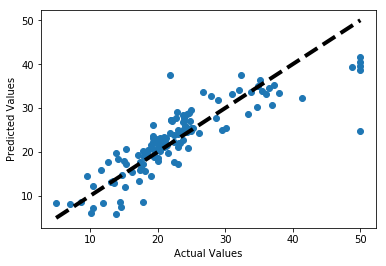

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
plt.show()

### Mean sqaure error for our implementation

In [251]:
print(mean_squared_error(y_test, y_pred))

21.891929561553084


### Using SGDRegressor from Sklearn

In [252]:
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(loss='squared_loss', penalty='none', 
                   max_iter=500, random_state=40, 
                   eta0=0.01, power_t=0.5, tol=0.001)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

#print(sgd.coef_, sgd.intercept_)

### Plotting predicted values vs actual values for sklearn implementation 

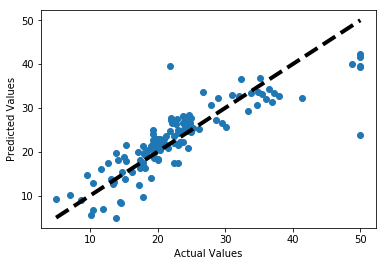

In [253]:
# Plotting Actual vs predicted values

fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel("Actual Values")
ax.set_ylabel("Predicted Values")
plt.show()

### Weight and Intercept for sklearn implementation 

In [254]:
print("Weight Vector : \n{}\n".format(sgd.coef_))
print("Intercept term : \n{}".format(sgd.intercept_))

Weight Vector : 
[-0.66540382  0.71061082 -0.25307557  1.08453022 -1.46088581  2.89578861
 -0.19932513 -2.33893193  1.12230508 -0.62262849 -1.66798501  0.80110647
 -3.72619133]

Intercept term : 
[22.49240887]


### Mean square error for sklearn implementation

In [255]:
print(mean_squared_error(y_test, y_pred))

21.90159126959665


### Tabular comparison between weight vectors

In [256]:
# Comparing the weight vectors for Our implementation
# and SGDRegressor implementation in sklearn

import prettytable as pt

wvec = pt.PrettyTable(hrules=pt.ALL, vrules=pt.ALL, padding_width=5)
#wvec.field_names = ["WeightVec (Our Implemenatation)", "WeightVec (Sklearn Implemenatation)"]
wvec.add_column("WeightVec (Our Implementation)", weights)
wvec.add_column("WeightVec (Sklearn Implementation)", sgd.coef_)

print(wvec)

+----------------------------------------+--------------------------------------------+
|     WeightVec (Our Implementation)     |     WeightVec (Sklearn Implementation)     |
+----------------------------------------+--------------------------------------------+
|          -0.8414624426457267           |            -0.6654038232730113             |
+----------------------------------------+--------------------------------------------+
|           1.2503528411923681           |             0.7106108200601592             |
+----------------------------------------+--------------------------------------------+
|          0.07786281837687324           |            -0.2530755720423145             |
+----------------------------------------+--------------------------------------------+
|           0.9702342593401336           |             1.084530221735219              |
+----------------------------------------+--------------------------------------------+
|           -2.195404514275849  

## Observations

1. SGD Implementation in sklearn provides similar results to our implementation.


2. MSE for Sklearn's Implmentation is 21.90 whereas MSE for our 
   implementation is 21.89.


3. Weight vectors differ slightly for both implementations but both seem 
   to be very close in terms of proportion of weights to each feature.


4. For our SGD implementation, we are converging fast compared to gradient descent.


5. Learning rate plays a crucial role in bringing the MSE down. 
   We observed better results for keeping learning rate at 0.01 
   than reducing it by half at each step.


6. Tried invariance scaling same as sklearn SGDRegressor but it gives worse results compared
   to keeping the learning rate at 0.01 for this particular dataset.
